In [ ]:
#Import liraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

import seaborn as sns

import tempfile
import os
import json
import tensorflow as tf

import warnings
import pickle


In [ ]:
#Load the data
df = pd.read_csv('kidney_disease.csv')

#print the 5 rows of data frame(df)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Get the shapeof the data(get the no of rows and columns)
df.shape
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Unable to convert column 'rbc' to numeric.
Unable to convert column 'pc' to numeric.
Unable to convert column 'pcc' to numeric.
Unable to convert column 'ba' to numeric.
Unable to convert column 'pcv' to numeric.
Unable to convert column 'wc' to numeric.
Unable to convert column 'rc' to numeric.
Unable to convert column 'htn' to numeric.
Unable to convert column 'dm' to numeric.
Unable to convert column 'cad' to numeric.
Unable to convert column 'appet' to numeric.
Unable to convert column 'pe' to numeric.
Unable to convert column 'ane' to numeric.
Unable to convert column 'classification' to numeric.


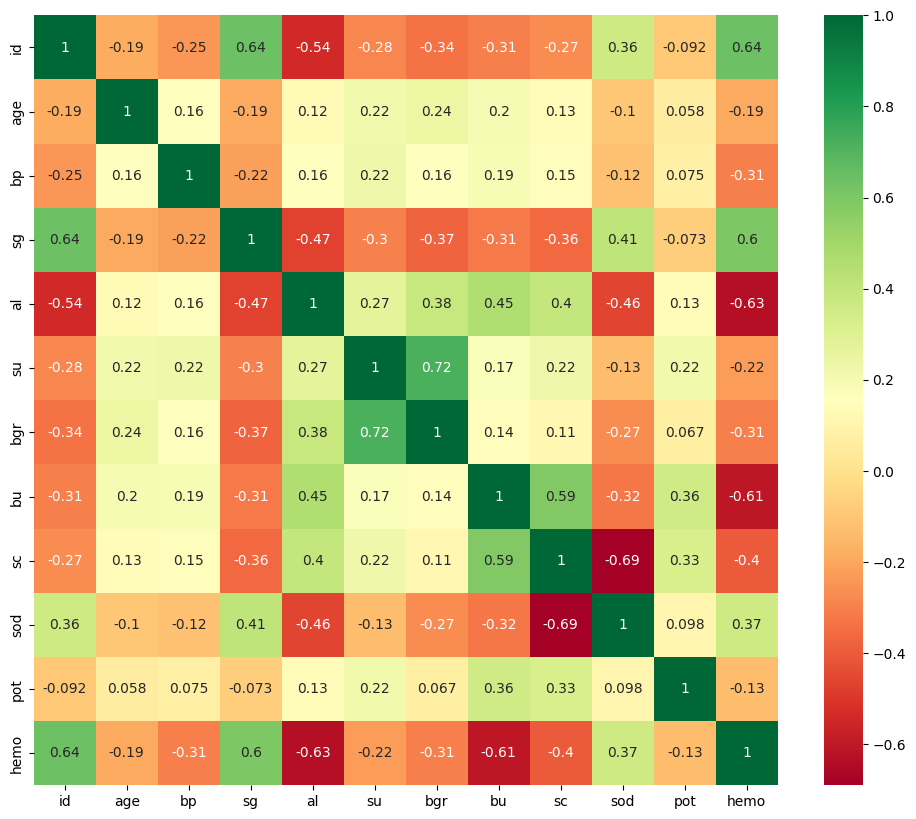

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            print(f"Unable to convert column '{column}' to numeric.")

# Drop any remaining non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corrmat = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
#Create a list of column names to keep
columns_to_retain = ['age', 'bp', 'sg','al', 'su', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification'] # try 1
#columns_to_retain = ['bp', 'sg', 'su', 'sc', 'htn', 'dm', 'classification'] # try 2

#Drop the columns thar are not in columns_to_retain
df = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

#Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
df.shape

(276, 10)

In [ ]:
#Transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

<ipython-input-32-bdc58c2c5612>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-32-bdc58c2c5612>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-32-bdc58c2c5612>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


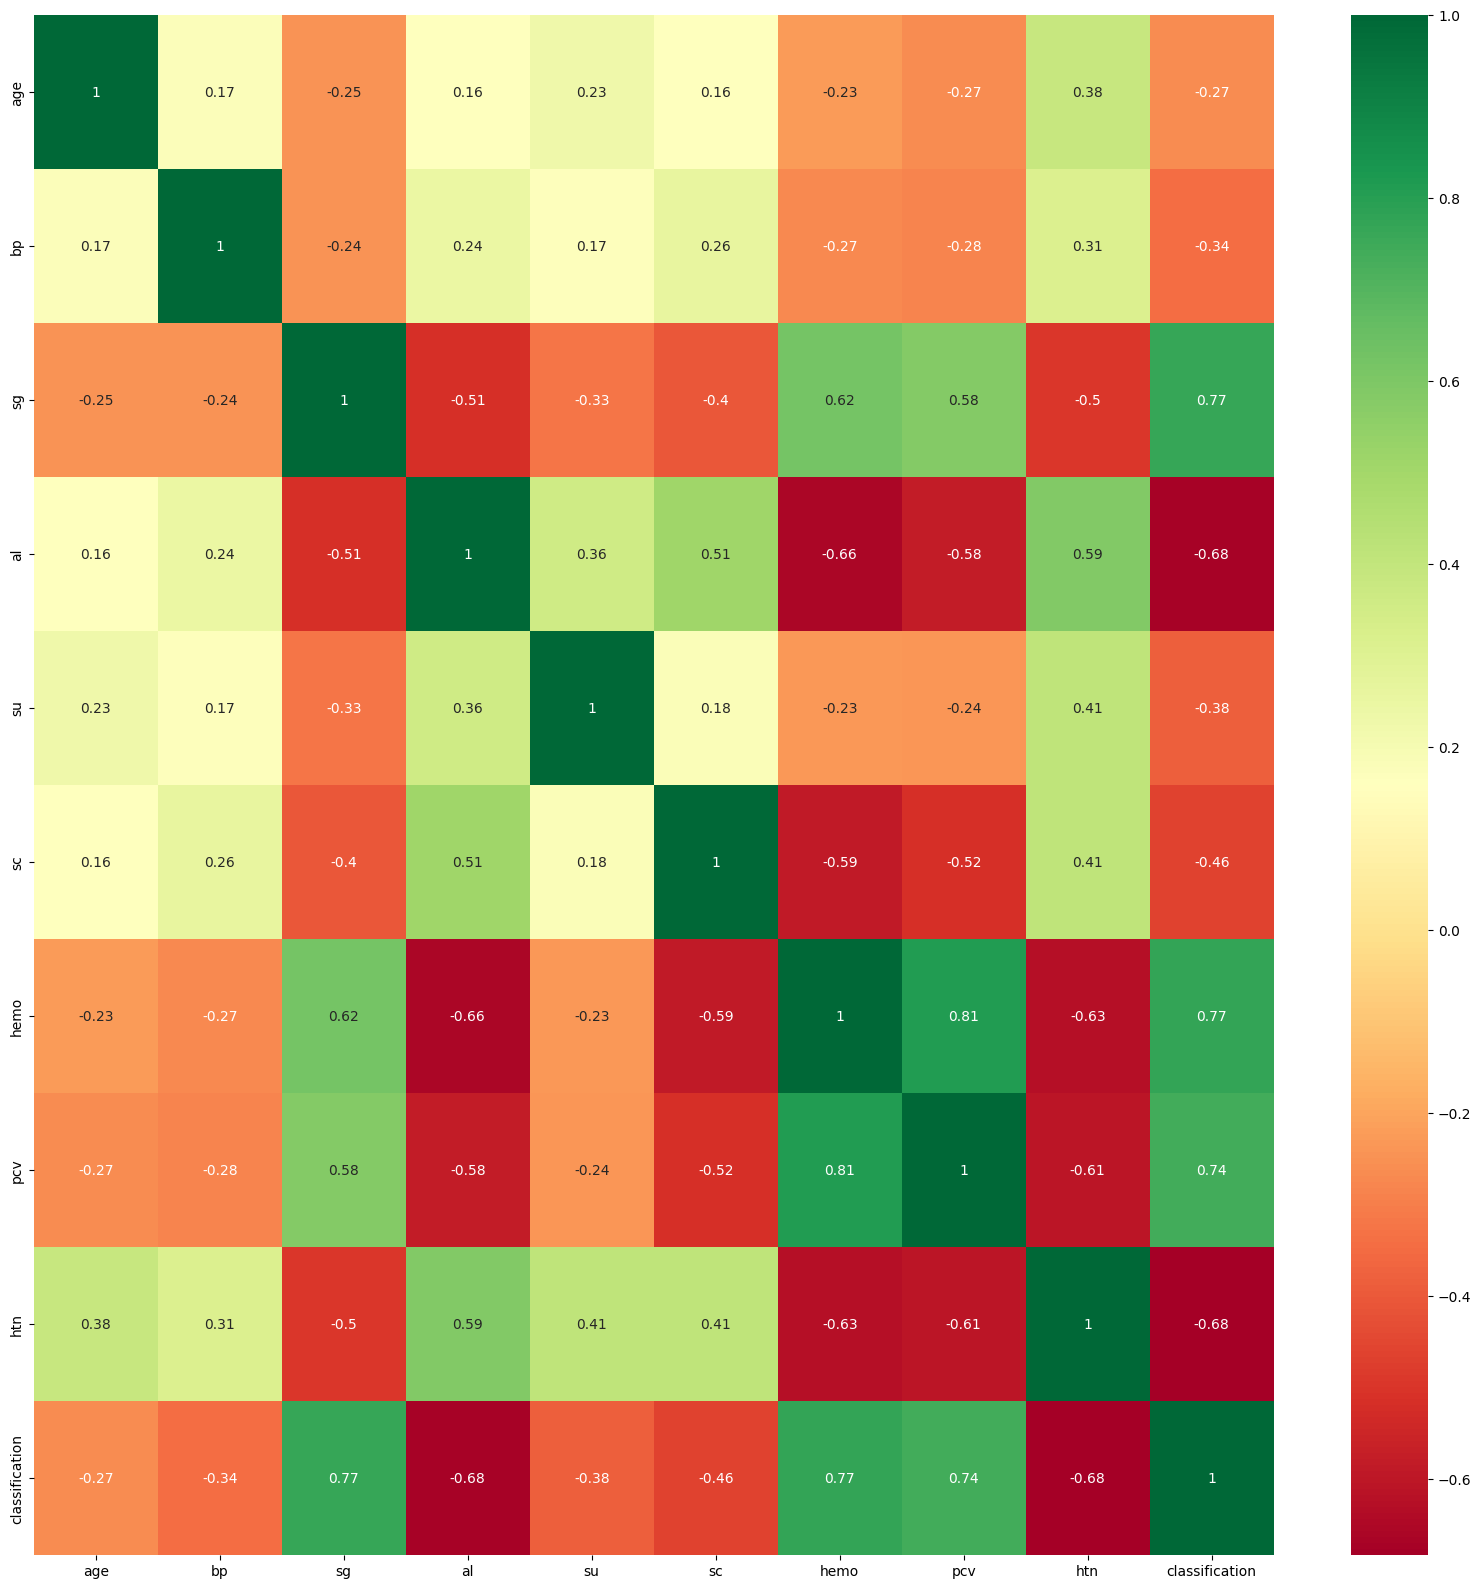

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Print the first 5 rows of the new cleaned data set
df.head(100)

,age,bp,sg,al,su,sc,hemo,pcv,htn,classification
0,48.0,80.0,1.020,1.0,0.0,1.2,15.4,27,1,0
1,7.0,50.0,1.020,4.0,0.0,0.8,11.3,21,0,0
2,62.0,80.0,1.010,2.0,3.0,1.8,9.6,14,0,0
3,48.0,70.0,1.005,4.0,0.0,3.8,11.2,15,1,0
4,51.0,80.0,1.010,2.0,0.0,1.4,11.6,18,0,0
...,...,...,...,...,...,...,...,...,...,...
158,71.0,60.0,1.020,3.0,2.0,1.5,10.9,14,1,0
159,59.0,80.0,1.010,1.0,0.0,1.3,10.4,18,0,0
163,46.0,80.0,1.010,0.0,0.0,2.0,9.0,10,1,0
167,34.0,70.0,1.020,0.0,0.0,0.9,12.7,25,0,0


In [ ]:
#Split the data into independent (X) data set (the features) and dependent (Y) data set (the target)
X = df.drop(['classification'], axis=1)
Y = df['classification']

In [ ]:
#Feature scaling
#min-max scalar method scales the data set so that all the input featires lie between 0 and 1
x_scalar = MinMaxScaler()
x_scalar.fit(X)
column_names = X.columns
X[column_names] = x_scalar.transform(X)

In [ ]:
#Split the data in to 80% training and 20% testing & shuffle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle=True)

In [ ]:
#Build the model using a sequential model
model = Sequential()
model.add(Dense(7, input_dim = len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='hard_sigmoid'))

In [ ]:
#Compile the model. binary_crossentropy is function use to two classes(yes or no like things)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train the model
history = model.fit(X_train, Y_train, epochs=250, batch_size=X_train.shape[0])

Epoch 1/250
1/1 [==============================] - 3s 3s/step - loss: 0.6998 - accuracy: 0.2409
Epoch 2/250
1/1 [==============================] - 0s 31ms/step - loss: 0.6981 - accuracy: 0.2636
Epoch 3/250
1/1 [==============================] - 0s 20ms/step - loss: 0.6964 - accuracy: 0.2955
Epoch 4/250
1/1 [==============================] - 0s 23ms/step - loss: 0.6948 - accuracy: 0.3818
Epoch 5/250
1/1 [==============================] - 0s 29ms/step - loss: 0.6934 - accuracy: 0.4500
Epoch 6/250
1/1 [==============================] - 0s 27ms/step - loss: 0.6920 - accuracy: 0.5182
Epoch 7/250
1/1 [==============================] - 0s 45ms/step - loss: 0.6906 - accuracy: 0.5818
Epoch 8/250
1/1 [==============================] - 0s 32ms/step - loss: 0.6893 - accuracy: 0.6409
Epoch 9/250
1/1 [==============================] - 0s 28ms/step - loss: 0.6880 - accuracy: 0.7409
Epoch 10/250
1/1 [==============================] - 0s 17ms/step - loss: 0.6866 - accuracy: 0.7818
Epoch 11/250
1/1 [===

In [ ]:
#Save the model
model.save('skd.model')

Text(0.5, 0, 'epoch')

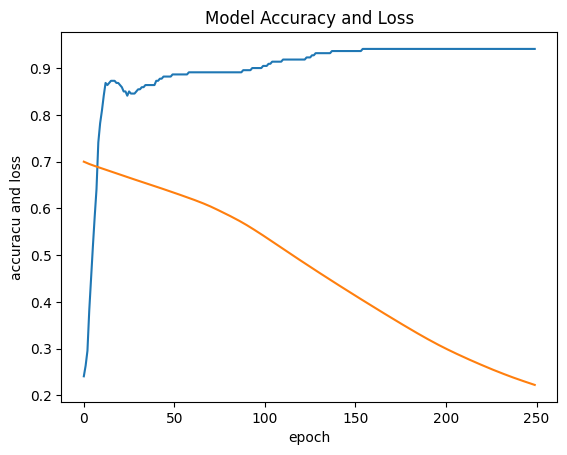

In [ ]:
#Visualize the mdoel loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('accuracu and loss')
plt.xlabel('epoch')

In [ ]:
#get the shape of the training and testing data set
print('shape of training data: ',X_train.shape)
print('shape of testing data: ',X_test.shape)

shape of training data:  (220, 9)
shape of testing data:  (56, 9)


In [ ]:
#show the actual values and predicted values
pred = model.predict(X_test) # pred will store the probability of having a CKD
pred = [1 if Y>=0.5 else 0 for Y in pred] # use this line of no need of a probability
pred

print('original  : {0}'.format(" , ".join(str(x) for x in Y_test)))
print('predicted : {0}'.format(" , ".join(str(x) for x in pred)))


2/2 [==============================] - 0s 12ms/step
original  : 0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0
predicted : 0 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 1 , 1 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 1 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 1


In [ ]:
#If need to predict for a one instance
#---------------------------------------

#myTestData = np.array([[0.729412,	0.333333,	0.25,	0.2,	0.0,	0.118644,	0.598639,	0.447368,	1.0]])
myTestData = np.array([[0.282353,	0.500000,	0.75,	0.0,	0.0,	0.021186,	0.979592,	0.605263,	0.0]])

pred = model.predict(myTestData)
pred

1/1 [==============================] - 0s 65ms/step


array([[0.78281504]], dtype=float32)

In [ ]:
# Obtain a temporary storage decvice
Model_directory = tempfile.gettempdir()

In [ ]:
Model_directory

'/tmp'

In [ ]:
#specify the model versio number
version = 1

In [ ]:
export_path = os.path.join(Model_directory, str(version))
print('Export_path = {}\n', format(export_path))

Export_path = {}
 /tmp/1


In [ ]:
#Pickle way to save model
pickle.dump(model,open('model.pkl','wb')) # to write the model to a pickle file
#model = pickle.load(open('model.pkl','rb')) # read from the pickle file again


In [ ]:
df.tail()

,age,bp,sg,al,su,sc,hemo,pcv,htn,classification
395,55.0,80.0,1.020,0.0,0.0,0.5,15.7,30,0,1
396,42.0,70.0,1.025,0.0,0.0,1.2,16.5,37,0,1
397,12.0,80.0,1.020,0.0,0.0,0.6,15.8,32,0,1
398,17.0,60.0,1.025,0.0,0.0,1.0,14.2,34,0,1
399,58.0,80.0,1.025,0.0,0.0,1.1,15.8,36,0,1


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sg'].plot(kind='hist', bins=20, title='sg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sc'].plot(kind='hist', bins=20, title='sc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='bp', y='sg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sg', y='sc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='sc', y='hemo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['al']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('al', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('al')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['al']
  ys = series['bp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('al', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('al')
_ = plt.ylabel('bp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['al']
  ys = series['sg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('al', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('al')
_ = plt.ylabel('sg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['al']
  ys = series['sc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('al', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('al')
_ = plt.ylabel('sc')

from matplotlib import pyplot as plt
_df_12['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['sg'].plot(kind='line', figsize=(8, 4), title='sg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['sc'].plot(kind='line', figsize=(8, 4), title='sc')
plt.gca().spines[['top', 'right']].set_visible(False)